In [1]:
from google.colab import files
uploaded = files.upload()

Saving 2023&2024_newdomain_merged(Sheet1).csv to 2023&2024_newdomain_merged(Sheet1).csv


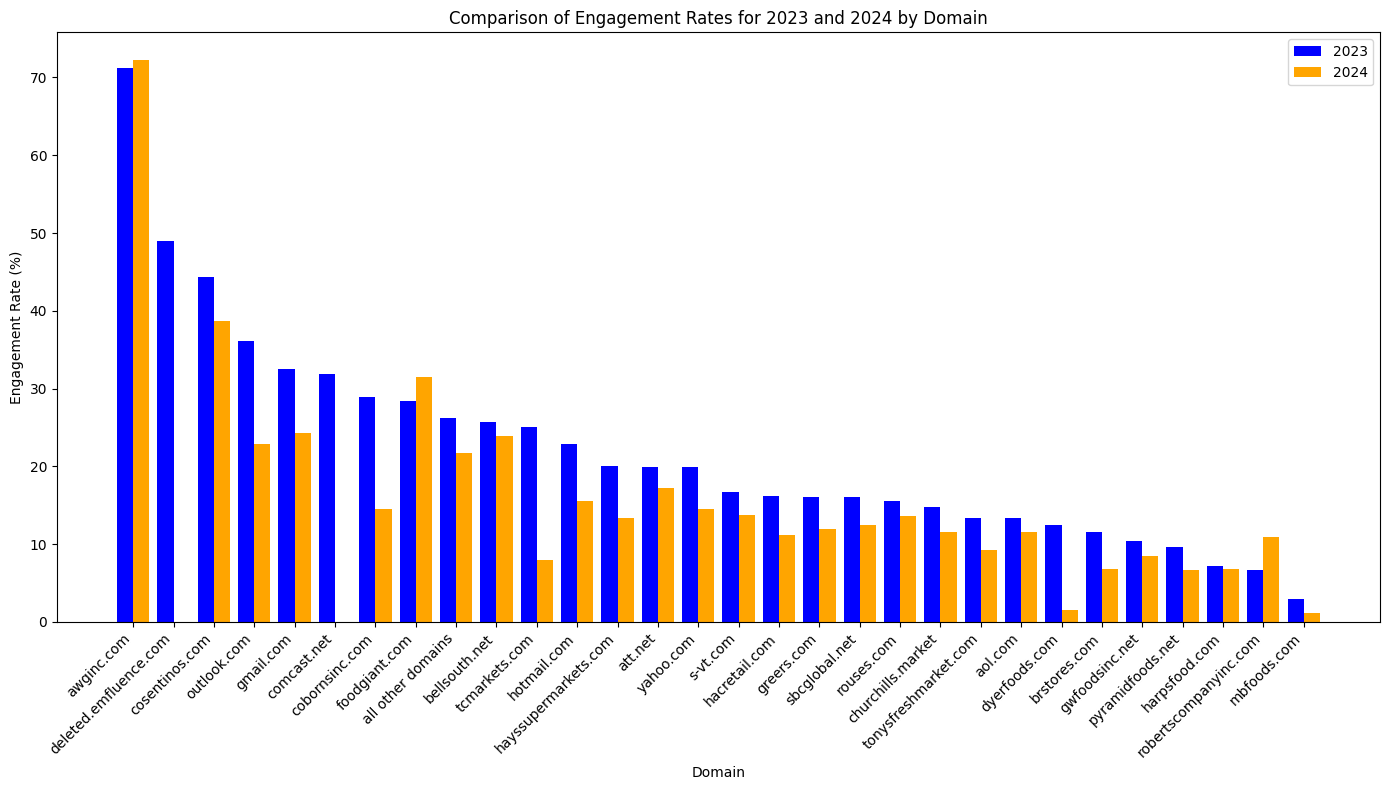

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
file_path = '2023&2024_newdomain_merged(Sheet1).csv'
df = pd.read_csv(file_path)

# Convert the 'Date' column to datetime format and extract the year
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year

# Aggregate data by Domain and Year
aggregated_df = df.groupby(['Domain', 'Year']).agg({
    'Sent': 'sum',
    'Unique Views': 'sum',
    'Unique Clicks': 'sum'
}).reset_index()

# Calculate Engagement Rate
aggregated_df['Engagement Rate (%)'] = ((aggregated_df['Unique Views'] + aggregated_df['Unique Clicks']) / aggregated_df['Sent']) * 100

# Pivot the data for plotting
pivot_df = aggregated_df.pivot(index='Domain', columns='Year', values='Engagement Rate (%)').fillna(0)

# Sort by 2023 Engagement Rate in descending order
pivot_df = pivot_df.sort_values(by=2023, ascending=False)

# Set bar width and positions
bar_width = 0.4
index = np.arange(len(pivot_df))

plt.figure(figsize=(14, 8))

# Plot 2023 data
plt.bar(index - bar_width/2, pivot_df[2023], bar_width, label='2023', color='blue')

# Plot 2024 data
plt.bar(index + bar_width/2, pivot_df[2024], bar_width, label='2024', color='orange')

# Add title and labels
plt.title('Comparison of Engagement Rates for 2023 and 2024 by Domain')
plt.xlabel('Domain')
plt.ylabel('Engagement Rate (%)')
plt.xticks(index, pivot_df.index, rotation=45, ha='right')
plt.legend()
plt.tight_layout()

# Display the plot
plt.show()
